In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('vgsales.csv')
print(df.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [3]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [4]:
df["Platform"].describe()

count     16598
unique       31
top          DS
freq       2163
Name: Platform, dtype: object

In [5]:
df2 = df['Platform'].value_counts()
print(df2.head())

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
Name: Platform, dtype: int64


TypeError: unsupported operand type(s) for +: 'int' and 'dict_values'

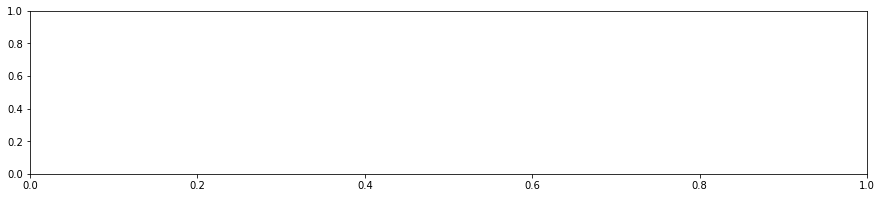

In [6]:
feat_list = ['Platform', 'Publisher','Genre']

for feat in feat_list:
    dictionary = dict(df[feat].value_counts())
    platform = plt.figure(figsize=(15,3))

    plt.bar(range(len(dictionary)), dictionary.values(), align='center')
    plt.xticks(range(len(dictionary)), dictionary.keys())
    plt.title(feat)

    plt.show()

Right off the bat Published is not a good input if we plan to use OneHotEncoding

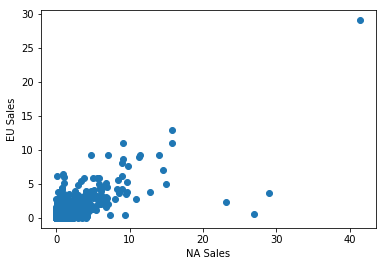

In [7]:
plt.scatter(x=df[['NA_Sales']], y=df[['EU_Sales']])
plt.xlabel('NA Sales')
plt.ylabel('EU Sales')

plt.show()

In [35]:
from sklearn.linear_model import LinearRegression, SGDRegressor
reg = SGDRegressor()

In [36]:
p = df["NA_Sales"].quantile(0.10)
q = df["EU_Sales"].quantile(0.10)

y_train = df[['EU_Sales']]
X_train = df[['NA_Sales']] 

reg.fit(X_train, y_train)
reg.score(X_train, y_train)

D:\Users\Prince\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
D:\Users\Prince\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5270588222116788

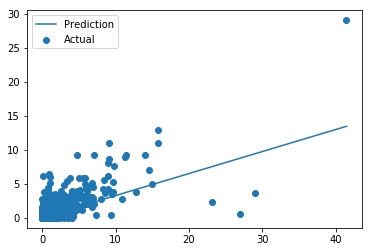

In [37]:
y_train_pred = reg.predict(X_train)
plt.scatter(X_train,y_train)
plt.plot(X_train,y_train_pred)
plt.legend(['Prediction', 'Actual'])

plt.show()

In [33]:
df.loc[df['NA_Sales'].idmax()]

AttributeError: 'Series' object has no attribute 'idmax'